In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Overview of our dataset

In [29]:
# Download the data of Davidson
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url,index_col=0,parse_dates=[0],encoding='ISO-8859-1')

The data are stored as a CSV and as a pickled pandas dataframe (Python 2.7). Each data file contains 5 columns:

count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [3]:
np.random.seed(42)
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [5]:
df["hate_speech"].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

In [6]:
df["class"].value_counts() 
#1430 tweets considered as hateful content

1    19190
2     4163
0     1430
Name: class, dtype: int64

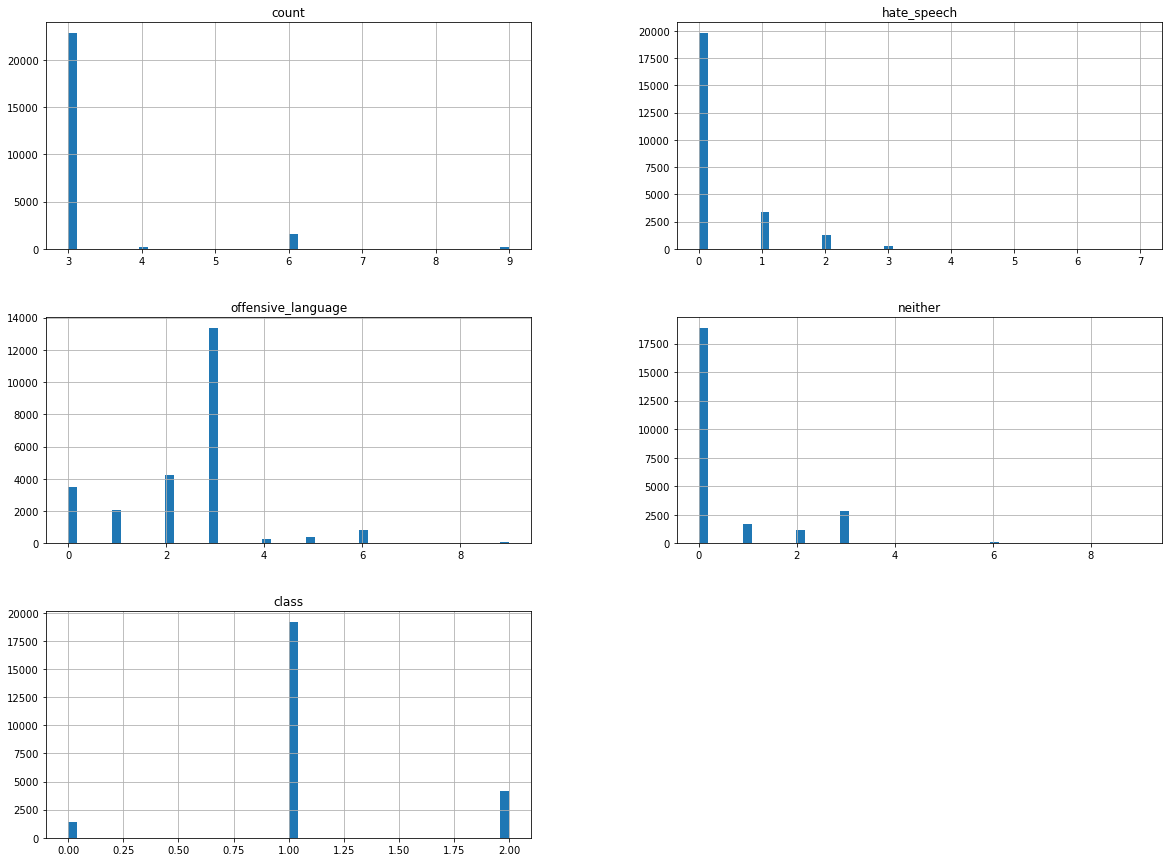

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#No missing values
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,count,hate_speech,offensive_language,neither,class,tweet


In [30]:
df = df.drop(columns=['count','hate_speech','offensive_language','neither'])

# Visualization of our datasets

## Visualization of the most frequent words

In [10]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

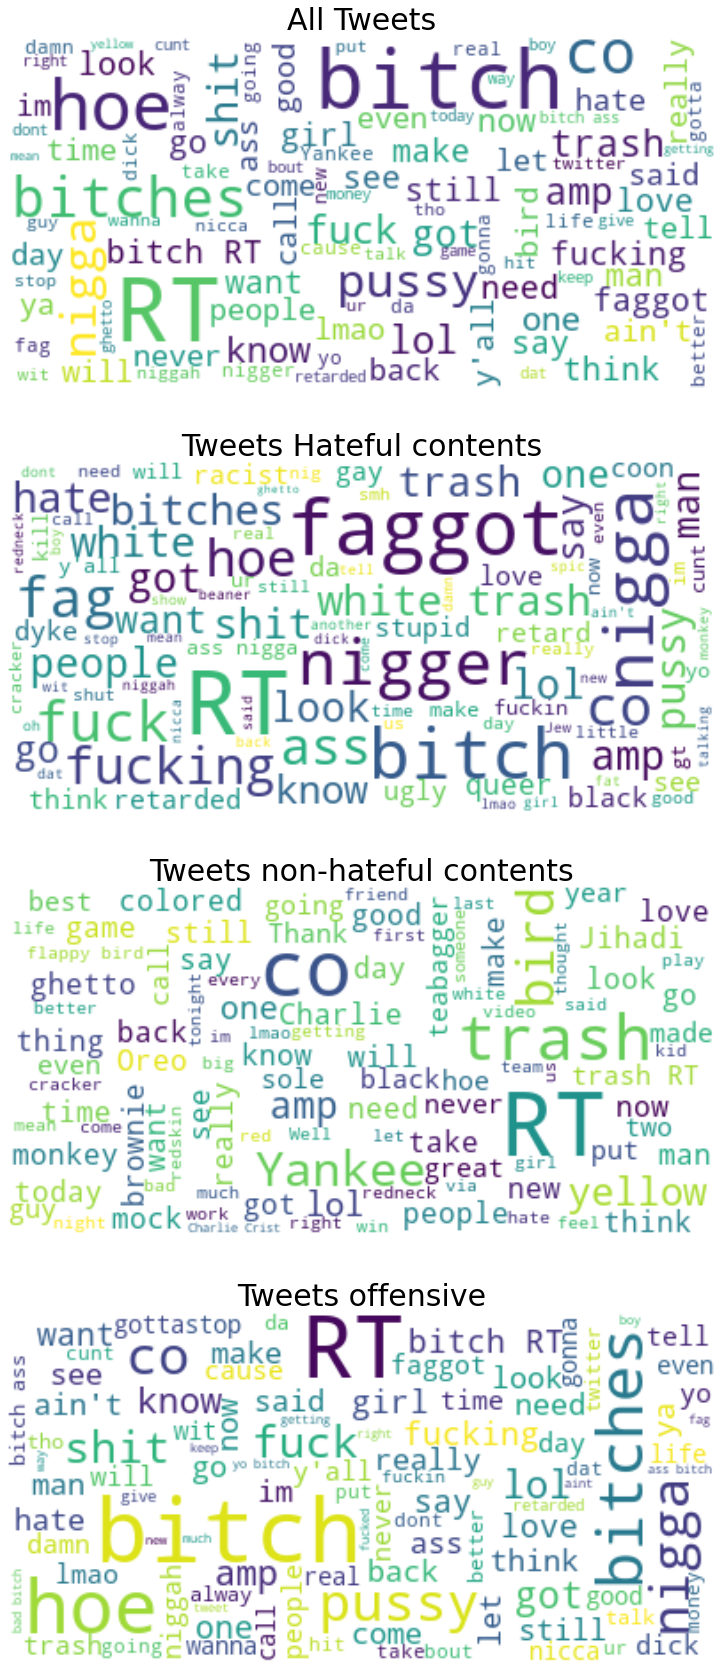

In [11]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
df_hateful = df[df['class']==0]
df_nonhateful = df[df['class']==2]
df_offensive = df[df['class']==1]
tweet_All = " ".join(review for review in df.tweet)
tweet_hateful = " ".join(review for review in df_hateful.tweet)
tweet_nonhateful = " ".join(review for review in df_nonhateful.tweet)
tweet_offensive = " ".join(review for review in df_offensive.tweet)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)
wordcloud_offensive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_offensive)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_offensive, interpolation='bilinear')
ax[3].set_title('Tweets offensive',fontsize=30)
ax[3].axis('off')

In [12]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['tweet'].apply(word_count)
df.head(3)

,class,tweet,word count
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,25
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,16
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,21


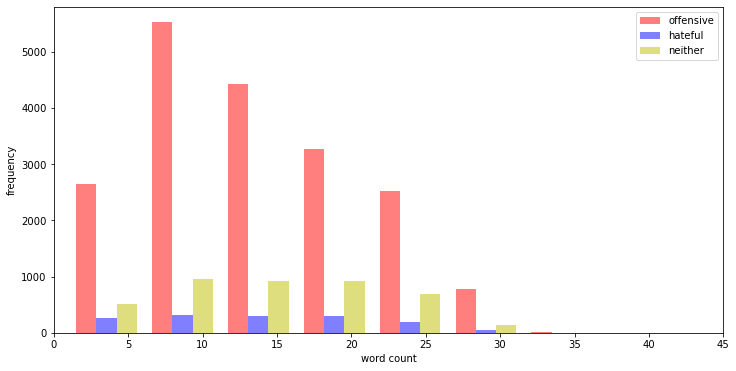

In [13]:
# plot word count distribution for both positive and negative sentiments
x = df['word count'][df['class'] == 1]
y = df['word count'][df['class']  == 0]
z = df['word count'][df['class']  == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y,z], color=['r','b','y'], alpha=0.5, label=['offensive','hateful','neither'])
plt.legend(loc='upper right')

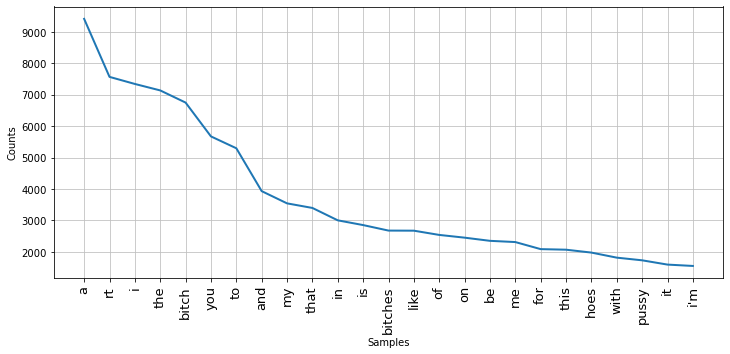

NameError: name 'Counter' is not defined

In [14]:
# most common words in twitter dataset
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 

word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Cleaning the tweets

### Remove stopwords & tokenization, punctions, urls, mentions

we do have some words in the dataset that are common in natural human language but used in most sentence compositions that we would be better left off since they bring no useful features to our model.

After removing stop-words we split all the sentences in the dataset to get individual words (tokens) which is basically a list of words per sentence contained in the newly processed tweet. Now we can see that we have two new columns in the dataframe that contains these tokenized versions of a tweet.

In [31]:
string.punctuation ##what we want to delete from tweets

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.corpus import stopwords

def remove_punct(text):
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    text  = [char for char in list(text) if char not in string.punctuation]
    text = ''.join(text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(mention_regex, '',text)
    text = re.sub(giant_url_regex, '',text)
    # To lowercase
    text = text.lower()
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    return [word for word in text.lower().split() if word.lower() not in stopwords.words('english')]

In [33]:
df = df.copy()
df['tokens'] = df['tweet'].apply(remove_punct)
df.head()

,class,tweet,tokens
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,"[rt, mayasolovely, woman, shouldnt, complain, cleaning, house, amp, man, always, take, trash]"
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,"[rt, mleew, boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, st, place]"
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,"[rt, urkindofbrand, dawg, rt, sbabylife, ever, fuck, bitch, start, cry, confused, shit]"
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,"[rt, cganderson, vivabased, look, like, tranny]"
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,"[rt, shenikaroberts, shit, hear, might, true, might, faker, bitch, told, ya]"


# Vectorization (Bag-of-words)

In [34]:
# vectorize
bow_transformer = CountVectorizer(analyzer=remove_punct).fit(df['tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# example of vectorized text
sample_tweet = df['tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

36320
"@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn


  (0, 1114)	1
  (0, 2992)	1
  (0, 7418)	1
  (0, 10500)	1
  (0, 10819)	1
  (0, 12640)	1
  (0, 12725)	1
  (0, 15732)	1
  (0, 31493)	1
  (0, 34132)	1
  (0, 36045)	1




In [35]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(df['tweet'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
countVectorizer = CountVectorizer(analyzer=remove_punct) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

24783 Number of tweets has 36320 words


# IDTif 
* weight of words depending on the frequency of their appearence based on the BoW

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
# example of vectorized text from the previous BoW and IDTiF
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 36045)	0.17656260483583813
  (0, 34132)	0.3658303487126007
  (0, 31493)	0.3806348590924486
  (0, 15732)	0.3806348590924486
  (0, 12725)	0.315213393398041
  (0, 12640)	0.13228328739293466
  (0, 10819)	0.22683990732707793
  (0, 10500)	0.1718323659169749
  (0, 7418)	0.3553263814351687
  (0, 2992)	0.3806348590924486
  (0, 1114)	0.2761289921175118


In [37]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(24783, 36320)


# Models

In [ ]:
## Split for tweets with BoW and TFIDF

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_tfidf, df['class'], test_size=0.2)

In [ ]:
## Split for tweets only BoW

In [82]:
df2 = df.copy()

,class,tweet,tokens
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,"[rt, mayasolovely, woman, shouldnt, complain, cleaning, house, amp, man, always, take, trash]"
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,"[rt, mleew, boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, st, place]"
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,"[rt, urkindofbrand, dawg, rt, sbabylife, ever, fuck, bitch, start, cry, confused, shit]"
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,"[rt, cganderson, vivabased, look, like, tranny]"
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,"[rt, shenikaroberts, shit, hear, might, true, might, faker, bitch, told, ya]"
...,...,...,...
25291,1,you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8...,"[yous, muthafin, lie, lifeasking, pearls, coreyemanuel, right, tl, trash, mine, bible, scripture..."
25292,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy","[youve, gone, broke, wrong, heart, baby, drove, redneck, crazy]"
25294,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,"[young, buck, wanna, eat, dat, nigguh, like, aint, fuckin, dis]"
25295,1,youu got wild bitches tellin you lies,"[youu, got, wild, bitches, tellin, lies]"


In [83]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(messages_bow, df2['class'], test_size=0.2)

In [ ]:
## Import models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Logistic regression

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
acc_LR = accuracy_score(y_test, predict_log)
acc_LR

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.898930804922332

In [ ]:
confusion_matrix(y_test, predict_log)

In [84]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train2, y_train2)
predict_log2 = log_reg2.predict(X_test2)
acc_LR2 = accuracy_score(y_test2, predict_log2)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
acc_LR2

0.893483962073835

## Naives Bayes

In [77]:
NB_reg = MultinomialNB()
NB_reg.fit(X_train, y_train)
predict_NB = log_reg.predict(X_test)
acc_NB = accuracy_score(y_test, predict_NB)

In [87]:
NB_reg2 = MultinomialNB()
NB_reg2.fit(X_train2, y_train2)
predict_NB2 = log_reg.predict(X_test2)
acc_NB2 = accuracy_score(y_test2, predict_NB2)

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
acc_RF = accuracy_score(y_test, predict)

In [89]:
rand_clf2 = RandomForestClassifier()
rand_clf2.fit(X_train2, y_train2)
predict2 = rand_clf2.predict(X_test2)
acc_RF2 = accuracy_score(y_test2, predict2)

In [ ]:
confusion_matrix(y_test, predict)

## Decision Tree

In [66]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
acc_DT = accuracy_score(y_test, predict_dt)

In [ ]:
confusion_matrix(y_test, predict_dt)

In [90]:
dt_clf2 = tree.DecisionTreeClassifier()
dt_clf2.fit(X_train2, y_train2)
predict_dt2 = dt_clf2.predict(X_test2)
acc_DT2 = accuracy_score(y_test2, predict_dt2)

## Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
acc_GBC = accuracy_score(y_test, predict_grad)

In [91]:
grad_clf2 = GradientBoostingClassifier()
grad_clf2.fit(X_train2, y_train2)
predict_grad2 = grad_clf2.predict(X_test2)
acc_GBC2 = accuracy_score(y_test2, predict_grad2)

In [97]:
confusion_matrix(y_test, predict_grad)

array([[  70,  186,   24],
       [  66, 3691,   76],
       [   4,  278,  562]], dtype=int64)

## SVM

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
predict_svc =  svc.predict(X_test)
acc_SVC = accuracy_score(y_test, predict_svc)

In [103]:
acc_SVC

0.8975186604801291

In [102]:
from sklearn.svm import SVC
svc2 = SVC(kernel = 'rbf')
svc2.fit(X_train2, y_train2)
predict_svc2 =  svc.predict(X_test2)
acc_SVC2 = accuracy_score(y_test2, predict_svc2)

0.8093605003026024

# Evaluation of the different models

In [105]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Regression', 'Naive Bayes','Random Forest','Decision Tree','Gradient Boosting Classifier','SVM','Logistic Regression', 'Naive Bayes','Random Forest','Decision Tree','Gradient Boosting Classifier','SVM'], 'Features' : ['Both','Both','Both','Both','Both','Both','BoW','BoW','BoW','BoW','BoW','BoW'],
    'Accuracy Scores': [acc_LR, acc_NB,acc_RF,acc_DT,acc_GBC, acc_SVC, acc_LR2,acc_NB2,acc_RF2,acc_DT2,acc_GBC2,acc_SVC2]}

result_df = pd.DataFrame(data=d)
result_df

,Classifiers,Features,Accuracy Scores
0,Logistic Regression,Both,0.898931
1,Naive Bayes,Both,0.791204
2,Random Forest,Both,0.894089
3,Decision Tree,Both,0.886423
4,Gradient Boosting Classifier,Both,0.872100
5,SVM,Both,0.897519
6,Logistic Regression,BoW,0.893484
7,Naive Bayes,BoW,0.911035
8,Random Forest,BoW,0.873109
9,Decision Tree,BoW,0.886020
